In [1]:
#Importo los paquetes a utilizar
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fftpack import ifft

In [2]:
#Importo los datos
monthrg = np.genfromtxt(os.path.expanduser("https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesDatos/master/hands_on/solar/monthrg.dat"),
                        skip_header=int((1900-1610)*12))

In [3]:
#Defino las variables para el año(teniendo en cuenta los intervalos de los meses) y el promedio de manchas solares
anio = monthrg[:,0]+((monthrg[:,1]-1)*(1/12))
promedio = monthrg[:,3]

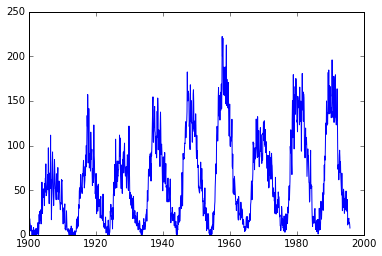

In [4]:
#Hago una gráfica inicial de promedio de manchas contra tiempo el tiempo para mirar el ruido
plt.plot(anio,promedio)

In [5]:
#Transformada del promedio
DFTmanchas = np.fft.fft(promedio)

#Norma de los vectores para evitar números complejos
absFreqsManchas = np.absolute(DFTmanchas)

#Transformada del tiempo
frecuencia = np.fft.fftfreq(anio.size,d=1/12)

(-0.25, 0.25)

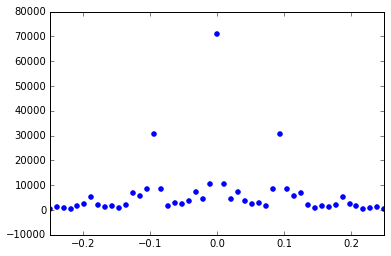

In [6]:
#Hago una gráfica de la transformada para mirar las frecuencias notorias
plt.scatter(frecuencia,absFreqsManchas,color="blue")
#Hago zoom a un espacio de la gráfica cercana al cero para mirar cuáles frecuencias no son relevantes
plt.xlim(-0.25,0.25)

(-0.25, 0.25)

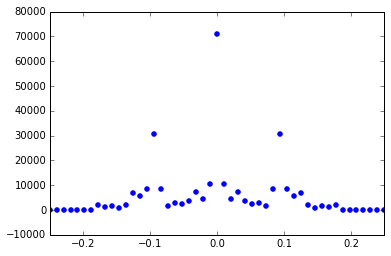

In [7]:
#Dato que por la gráfica anterior y por la inicial se nota que el ruido proviene de frecuencias altas entonces
#mando a cero todas las frecuencias altas
DFTmanchas[np.absolute(frecuencia)>=0.18]=0
absFreqsManchas = np.absolute(DFTmanchas)

#Vuelvo a graficar para mirar el filtrado
plt.scatter(frecuencia,absFreqsManchas,color="blue")
plt.xlim(-0.25,0.25)

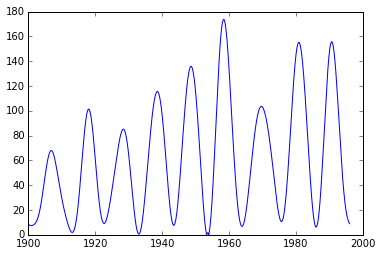

In [8]:
#Dado que ya filtré hago la transformada inversa y vuelvo a hacer la gráfica para observar cómo quedó
ajusteFiltrado=np.absolute(ifft(DFTmanchas))
plt.plot(anio,ajusteFiltrado)

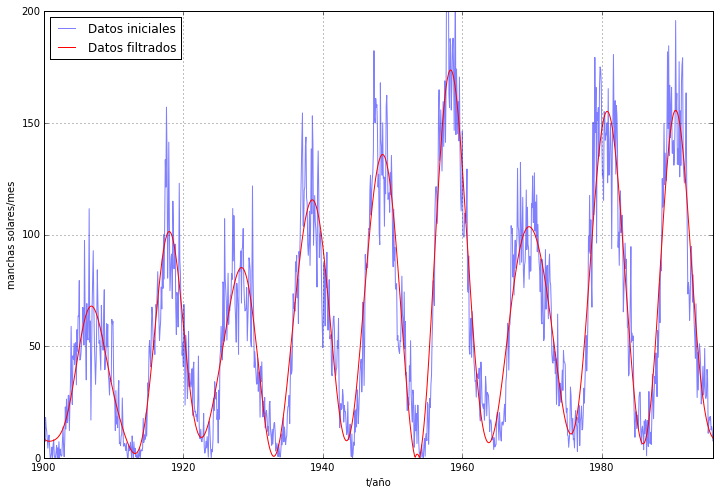

In [12]:
#Comparo gráfica inicial con la filtrada
plt.figure(figsize=(12, 8))
plt.plot(anio,promedio,label="Datos iniciales",color="blue",alpha=0.5)
plt.plot(anio,ajusteFiltrado,label="Datos filtrados",color="red")
plt.legend(loc=0)
plt.xlabel("t/año")
plt.ylabel("manchas solares/mes")
plt.ylim(0,200)
plt.xlim(1900,1996)
plt.grid()
plt.savefig("filtradoFourier.png")

In [10]:
#Ahora para hallar el el periodo del ciclo solar vuelvo a la gráfica en fourier que filtré.
#El periodo T = 1/f. Basta con hallar la frecuencia más notable que aparece en esa gráfica.
#Esta frecuencia es la que está representada por dos picos al rededor del cero,
#no se tiene en cuenta el pico más alto al rededor de 0 porque este tiene frecuencia 0.

#Encuentro el índice del máximo mencionado para poder hallar el valor de la frecuencia y así el periodo
frecuenciaBuscada = absFreqsManchas[frecuencia>0]
maximo = np.amax(frecuenciaBuscada)
for i in range(len(frecuenciaBuscada)):
    if (frecuenciaBuscada[i] ==maximo):
        indice = i

In [11]:
periodo = 1/frecuencia[indice]
print ("El periodo del ciclo solar es de %.f años"%periodo)

El periodo del ciclo solar es de 12 años
